# ESM-IF

## plain ESM-IF

In [1]:
import pandas
from copy import deepcopy

In [2]:
esmif_df = pandas.read_csv("esmif_fixed.csv", index_col=1).drop(["Unnamed: 0","guess"], axis=1)
esmif_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
pdb_code,,,,,,,,
1a23,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393
1a23,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984
1a23,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226
1a43,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269
1a43,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395
...,...,...,...,...,...,...,...,...
5pti,A,36,G,S,-0.70,-1.091251,-1.304181,-0.212930
5pti,A,37,G,A,-3.01,-1.091251,-1.346041,-0.254790
5pti,A,37,G,D,-1.70,-1.091251,-1.349016,-0.257765


,ddg,delta
ddg,1.000000,0.408315
delta,0.408315,1.000000


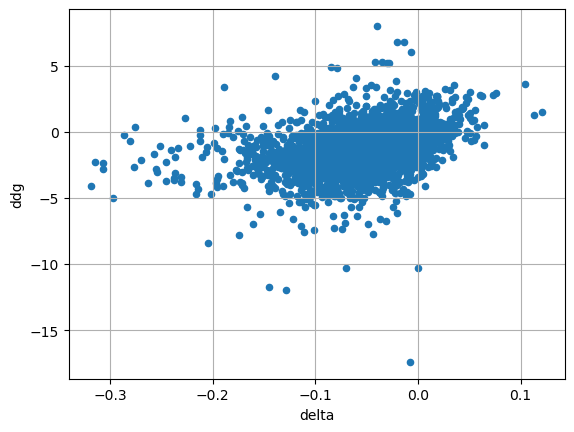

In [3]:
plain_esmif_plot= esmif_df.plot.scatter(x="delta", y="ddg", grid=True)
esmif_df[["ddg", "delta"]].corr()

In [4]:
def anti(x):
    #_anti = deepcopy(x)
    x['to_aa'], x['from_aa']  =  x['from_aa'], x['to_aa']
    x['ll_mut'], x['ll_native']  =  x['ll_native'], x['ll_mut']
    x['ddg'] = -x['ddg']
    x['delta'] = -x['delta']
    return x

anti_df = deepcopy(esmif_df).apply(anti, axis=1)

In [5]:
anti_df.head()

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
pdb_code,,,,,,,,
1a23,A,32,L,H,-5.30,-1.857081,-1.814687,0.042393
1a23,A,32,S,H,-5.20,-1.844672,-1.814687,0.029984
1a23,A,32,Y,H,-6.80,-1.834913,-1.814687,0.020226
1a43,A,156,A,G,2.40,-1.595537,-1.505268,0.090269
1a43,A,159,D,E,4.55,-1.601663,-1.505268,0.096395


In [6]:
double_df = pandas.concat([esmif_df,anti_df],ignore_index=True)
assert len(double_df) == 2* len(esmif_df)
double_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395
...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800


,ddg,delta
ddg,1.000000,0.617579
delta,0.617579,1.000000


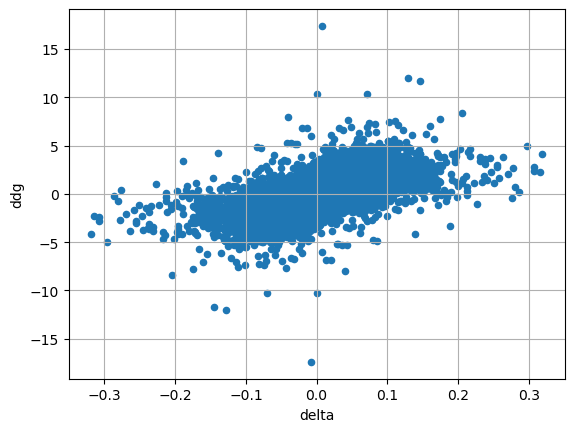

In [7]:
plain_double_plot= double_df.plot.scatter(x="delta", y="ddg", grid=True)
double_df[["ddg", "delta"]].corr()

## ddFEP

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
X = double_df["delta"].to_numpy().reshape(-1, 1)
y = double_df["ddg"].to_numpy()
X.shape, y.shape

((6542, 1), (6542,))

In [10]:
lin = LinearRegression(fit_intercept=True).fit(
    X,
    y,
)

In [11]:
import math

lin.coef_, lin.intercept_, math.sqrt(lin.score(X, y))

(array([18.1892629]), 0.0, 0.617578570071395)

In [12]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [13]:
#esmif_df.head()
def kd_delta(x):
    x['kd_delta']=kd[x['from_aa']] - kd[x['to_aa']]
    return x
ddfep_df = double_df.apply(kd_delta, 
               axis='columns'
              )

In [14]:
ddfep_df

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta,kd_delta
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393,-7.0
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984,-2.4
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226,-1.9
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269,-2.2
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395,0.0
...,...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930,-0.4
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790,2.2
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765,-3.1
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800,1.0


In [15]:
X_fep= ddfep_df[['delta','kd_delta']].to_numpy()

In [16]:
ddfep_model = LinearRegression(fit_intercept=True).fit(
    X_fep,
    y,
)

In [17]:
ddfep_model.coef_, ddfep_model.intercept_, math.sqrt(ddfep_model.score(X_fep, y))

(array([18.46638381, -0.08071347]), 0.0, 0.634276682732422)

In [18]:
ddfep_df['ddfep']=ddfep_model.predict(X_fep)

1.524836698083587

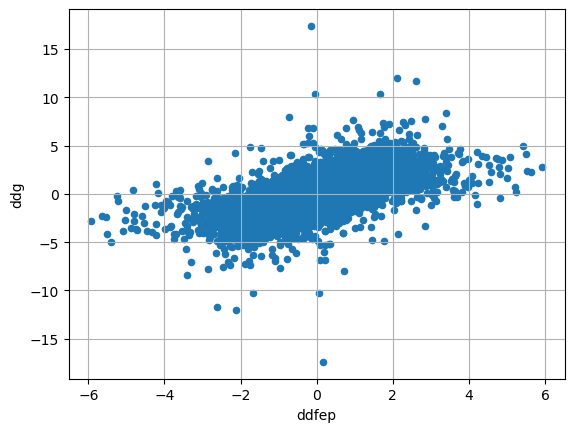

In [19]:
ddfep_plot= ddfep_df.plot.scatter(x='ddfep',y='ddg', grid=True)

math.sqrt(mean_squared_error(ddfep_df['ddg'],ddfep_df['ddfep']))

In [20]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_fep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_fep, y > 0))
rsq

array([0.4108419 , 0.43467735, 0.39935284, 0.37588195, 0.39067412,
       0.36703465, 0.41372454, 0.40957354, 0.41310186, 0.40315336,
       0.40036806, 0.38277866, 0.3997572 , 0.43279337, 0.39200992,
       0.43678746, 0.4057725 , 0.38204395, 0.37854756, 0.39492385,
       0.37778163, 0.38898655, 0.38948149, 0.42943299, 0.42251101,
       0.42126807, 0.39806479, 0.42862653, 0.40525886, 0.35356801,
       0.42187998, 0.39638684, 0.40261373, 0.40580839, 0.37675604,
       0.40954691, 0.41766489, 0.41600142, 0.35492008, 0.41186414,
       0.40423779, 0.42435625, 0.39417071, 0.41554375, 0.3663043 ,
       0.40959232, 0.41246432, 0.38555851, 0.34862477, 0.43962834])

In [21]:
math.sqrt(rsq.mean())

0.6332882763703912

In [22]:
sum([math.sqrt(_) for _ in rsq])/len(rsq)


0.6330558598397289

## ddFEP w. optimized aa. DG(aq)

In [23]:
ddfep_opt = deepcopy(double_df)
for _ in sorted(kd.keys()):
    ddfep_opt[_] = 0
ddfep_opt

,chain,position,from_aa,to_aa,ddg,ll_native,ll_mut,delta,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,A,32,H,L,5.30,-1.814687,-1.857081,-0.042393,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,32,H,S,5.20,-1.814687,-1.844672,-0.029984,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,32,H,Y,6.80,-1.814687,-1.834913,-0.020226,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,156,G,A,-2.40,-1.505268,-1.595537,-0.090269,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,159,E,D,-4.55,-1.505268,-1.601663,-0.096395,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,A,36,S,G,0.70,-1.304181,-1.091251,0.212930,0,0,...,0,0,0,0,0,0,0,0,0,0
6538,A,37,A,G,3.01,-1.346041,-1.091251,0.254790,0,0,...,0,0,0,0,0,0,0,0,0,0
6539,A,37,D,G,1.70,-1.349016,-1.091251,0.257765,0,0,...,0,0,0,0,0,0,0,0,0,0
6540,A,4,L,F,2.20,-1.230052,-1.091251,0.138800,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [25]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')

In [26]:
### fit test

In [27]:
X_optfep= ddfep_opt[['delta']+sorted(kd.keys())].to_numpy()
X_optfep.shape

(6542, 21)

In [28]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [29]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([16.16561359, -0.34366738,  0.16327681, -0.72454545, -0.27281635,
         0.40474471, -0.74782801, -0.38724922,  0.81059475, -0.43708928,
         0.66801589,  0.53828871, -0.36865393, -0.09195675, -0.28897946,
         0.23990634, -0.68022353, -0.40292087,  0.3278705 ,  0.93604634,
         0.6571862 ]),
 0.0,
 0.6937841256825152)

#### ddMBC coefs

In [30]:
coefs=dict(zip(["delta"] + sorted(kd.keys()), dd_optfep_model.coef_))
coefs

{'delta': 16.165613585193352,
 'A': -0.3436673829064738,
 'C': 0.163276808097711,
 'D': -0.7245454457504699,
 'E': -0.272816352692793,
 'F': 0.40474470996485234,
 'G': -0.7478280136097462,
 'H': -0.38724922029524217,
 'I': 0.8105947454263913,
 'K': -0.4370892823082324,
 'L': 0.6680158872732731,
 'M': 0.5382887101586262,
 'N': -0.3686539314187636,
 'P': -0.09195675079884456,
 'Q': -0.2889794599227879,
 'R': 0.2399063449987485,
 'S': -0.6802235340223245,
 'T': -0.4029208682438145,
 'V': 0.3278704980333529,
 'W': 0.9360463405674017,
 'Y': 0.6571861974491311}

In [34]:
coefs_df = pandas.DataFrame({'ESM-IF1': coefs})
coefs_df
#coefs_df.to_csv('esmif_params.csv')

,ESM-IF1
delta,16.165614
A,-0.343667
C,0.163277
D,-0.724545
E,-0.272816
F,0.404745
G,-0.747828
H,-0.387249
I,0.810595
K,-0.437089


In [30]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

RMSE: 1.4204537503586419


,ddg,ddfep_opt
ddg,1.000000,0.693784
ddfep_opt,0.693784,1.000000


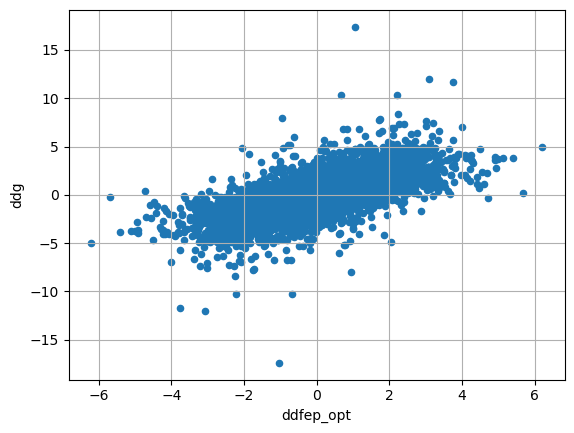

In [31]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

print('RMSE:',math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt'])))
ddfep_opt[['ddg','ddfep_opt']].corr()

#### compare w. Kyte-Doolittle

In [32]:
scales =pandas.DataFrame( {'ddFEP Scale': dd_optfep_model.coef_[1:]}, index=sorted(kd.keys()))
scales['KD']=kd
scales

,ddFEP Scale,KD
A,-0.343667,1.8
C,0.163277,2.5
D,-0.724545,-3.5
E,-0.272816,-3.5
F,0.404745,2.8
G,-0.747828,-0.4
H,-0.387249,-3.2
I,0.810595,4.5
K,-0.437089,-3.9
L,0.668016,3.8


### Crossvalidate

In [33]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.48796038, 0.48719022, 0.46449424, 0.49132951, 0.45594396,
       0.50211013, 0.47095857, 0.47102136, 0.43959609, 0.49919804,
       0.44388485, 0.46359072, 0.47192526, 0.48887448, 0.51744217,
       0.51360898, 0.45317588, 0.49705068, 0.48710723, 0.4436955 ,
       0.49174498, 0.47617821, 0.49200775, 0.45214172, 0.46718004,
       0.46122411, 0.49031772, 0.50077519, 0.44147702, 0.49113607,
       0.50660614, 0.47204753, 0.50181321, 0.44914058, 0.45490953,
       0.45328848, 0.46298936, 0.51287877, 0.48859849, 0.47090889,
       0.44730489, 0.44403113, 0.49379964, 0.52467866, 0.47999947,
       0.45239693, 0.47209023, 0.46958457, 0.47860761, 0.51627096])

In [34]:
math.sqrt(optfep_rsq.mean())

0.6908876340655671

In [35]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.6906939716563413

## Test on S669

In [37]:
esmif_s669_df = pandas.read_csv('esmif_s669_fixed.csv', index_col=1).drop("Unnamed: 0.1", axis=1)
esmif_s669_df= pandas.concat([ esmif_s669_df, deepcopy(esmif_s669_df).apply(anti, axis=1)], ignore_index=True)
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758
...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349


In [38]:
for _ in sorted(kd.keys()):
    esmif_s669_df[_] = 0
esmif_s669_df= esmif_s669_df.apply(encode_mutation, axis='columns')
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,M,N,P,Q,R,S,T,V,W,Y
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,0,0,0,0,-1,0,0,0,0
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,0,0,0,0
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,0,0,0,0
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030,0,...,0,0,-1,0,0,0,0,0,0,0
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343,0,...,0,0,0,0,0,0,0,0,0,1
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821,0,...,0,0,0,0,0,1,0,0,0,0
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349,0,...,0,0,0,0,0,0,-1,1,0,0


In [39]:
X_s669=esmif_s669_df[['delta']+sorted(kd.keys())].to_numpy()
y_s669=esmif_s669_df['ddg'].to_numpy()

In [40]:
esmif_s669_df['ddfep_opt']=dd_optfep_model.predict(X_s669)

0.5661798654154678

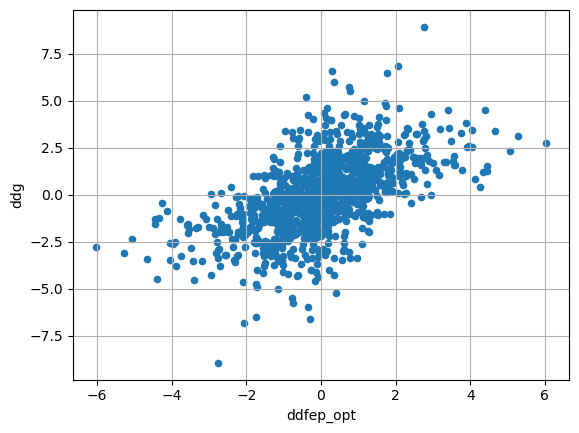

In [41]:
esmif_s669_plot = esmif_s669_df.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

math.sqrt(dd_optfep_model.score(X_s669, y_s669))

In [42]:
math.sqrt(mean_squared_error(esmif_s669_df['ddg'],esmif_s669_df['ddfep_opt']))

1.5642172187698051

In [43]:
esmif_s669_df[['ddg','ddfep_opt']].corr()

,ddg,ddfep_opt
ddg,1.000000,0.585352
ddfep_opt,0.585352,1.000000


In [44]:
# only esmi-if
esmif_s669_df[['ddg','delta']].corr()

,ddg,delta
ddg,1.00000,0.53355
delta,0.53355,1.00000


## S461 

In [61]:
s461_df=pandas.read_csv('S461.mut',sep=' ')

In [62]:
## extract mutations to simpler csv
s461_mutations = pandas.DataFrame(s461_df['ddg'])
s461_mutations['pdb_code'] = s461_df['pdb'].apply(lambda x: x[:4].lower())
s461_mutations['chain'] = s461_df['pdb'].apply(lambda x: x[-1].upper())
s461_mutations['position'] = s461_df['mut'].apply(lambda x: int(x[1:-1]))
s461_mutations['from_aa'] = s461_df['mut'].apply(lambda x: x[0].upper())
s461_mutations['to_aa'] = s461_df['mut'].apply(lambda x: x[-1].upper())
s461_mutations

,ddg,pdb_code,chain,position,from_aa,to_aa
0,-1.800,1a0f,A,11,S,A
1,-1.745,1ba3,A,461,H,D
2,0.287,1ba3,A,489,H,D
3,-0.287,1ba3,A,489,H,K
4,-0.263,1ba3,A,489,H,M
...,...,...,...,...,...,...
456,0.060,4he7,A,19,A,G
457,-0.460,4he7,A,19,A,K
458,-1.440,5jxb,A,329,D,G
459,-1.440,5jxb,A,329,D,P


In [63]:
def mut_hash(x):
    #return '_'.join([x['pdb_code'],x['chain'],str(x['position']),x['from_aa'],x['to_aa']])
    return '_'.join([x['pdb_code'],x['chain'],str(x['position'])])
    
s461_hashes=set(s461_mutations.apply(mut_hash, axis=1))

In [64]:
esmif_s669_df['s461']=esmif_s669_df.apply(lambda x: mut_hash(x) in s461_hashes,axis=1)
esmif_s669_df

,ddg,pdb_code,chain,position,from_aa,to_aa,ll_native,ll_mut,delta,A,...,P,Q,R,S,T,V,W,Y,ddfep_opt,s461
0,-1.800,1a0f,A,11,S,A,-0.897660,-0.916243,-0.018583,1,...,0,0,0,-1,0,0,0,0,0.036143,True
1,-2.690,1a7v,A,104,A,H,-0.891637,-0.954156,-0.062519,-1,...,0,0,0,0,0,0,0,0,-1.054235,False
2,-0.600,1a7v,A,13,K,H,-0.891637,-0.912219,-0.020582,0,...,0,0,0,0,0,0,0,0,-0.282878,False
3,-2.880,1a7v,A,20,K,H,-0.891637,-0.941380,-0.049742,0,...,0,0,0,0,0,0,0,0,-0.754274,False
4,-1.360,1a7v,A,3,D,H,-0.891637,-0.954395,-0.062758,0,...,0,0,0,0,0,0,0,0,-0.677217,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1.440,5jxb,A,329,P,D,-1.708549,-1.677519,0.031030,0,...,-1,0,0,0,0,0,0,0,-0.130976,True
1272,2.990,5oaq,A,429,H,Y,-1.558999,-1.536656,0.022343,0,...,0,0,0,0,0,0,0,1,1.405620,True
1273,0.378,5vp3,A,128,G,S,-1.307405,-1.274585,0.032821,0,...,0,0,0,1,0,0,0,0,0.598170,False
1274,-0.354,5vp3,A,183,T,V,-1.296933,-1.274585,0.022349,0,...,0,0,0,0,-1,1,0,0,1.092072,False


In [65]:
esmif_s461_df=esmif_s669_df[esmif_s669_df['s461']]
len(esmif_s461_df)

870

RMSE: 1.2530722540602857


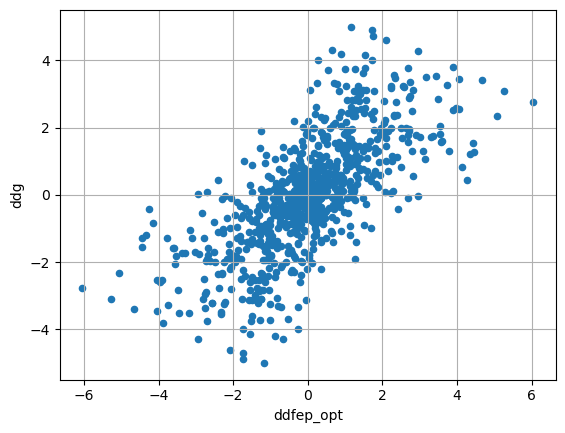

In [66]:
esmif_s461_plot = esmif_s461_df.plot.scatter(x="ddfep_opt", y="ddg", grid=True)

print(
    "RMSE:",
    math.sqrt(mean_squared_error(esmif_s461_df["ddg"], esmif_s461_df["ddfep_opt"])),
)

In [67]:
esmif_s461_df[['ddg','ddfep_opt']].corr()

,ddg,ddfep_opt
ddg,1.000000,0.702336
ddfep_opt,0.702336,1.000000


In [68]:
# only esmi-if
esmif_s461_df[['ddg','delta']].corr()

,ddg,delta
ddg,1.000000,0.637964
delta,0.637964,1.000000


### Training

In [69]:
from sklearn.metrics import classification_report

In [70]:
def stabilization_class(x):
    if x > 1.0:
        return 1
    if x < -1.0:
        return -1
    return 0

states3_df=ddfep_opt[['ddg','ddfep_opt']]
states3_df.map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.619477
ddfep_opt,0.619477,1.000000


In [71]:
print(classification_report(states3_df['ddg'].map(stabilization_class),
                      states3_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.71      0.58      0.64      1679
           0       0.65      0.77      0.70      3184
           1       0.71      0.58      0.64      1679

    accuracy                           0.67      6542
   macro avg       0.69      0.64      0.66      6542
weighted avg       0.68      0.67      0.67      6542



### S669

In [72]:
esmif_s669_df[['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.570262
ddfep_opt,0.570262,1.000000


In [73]:
print(classification_report(esmif_s669_df['ddg'].map(stabilization_class),
                      esmif_s669_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.67      0.54      0.60       330
           0       0.62      0.75      0.68       616
           1       0.67      0.54      0.60       330

    accuracy                           0.64      1276
   macro avg       0.65      0.61      0.62      1276
weighted avg       0.65      0.64      0.64      1276



### S461

In [74]:
esmif_s461_df[['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.00000,0.67685
ddfep_opt,0.67685,1.00000


In [75]:
print(classification_report(esmif_s461_df['ddg'].map(stabilization_class),
                      esmif_s461_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.72      0.67      0.69       213
           0       0.71      0.76      0.74       444
           1       0.72      0.67      0.69       213

    accuracy                           0.71       870
   macro avg       0.72      0.70      0.71       870
weighted avg       0.72      0.71      0.71       870

